In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt2

#### Load human behav data

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt2.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt2.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_supcat, dprime_by_supcat = analyze_expt2.get_perf_by_supercateg()
acc_by_bascat, dprime_by_bascat = analyze_expt2.get_perf_by_basiccateg()
acc_by_bascat_combinesubs, dprime_by_bascat_combinesubs = analyze_expt2.get_perf_by_basiccateg_combinesubjects()

acc_by_condition, dprime_by_condition, propyes_by_condition = analyze_expt2.get_perf_by_cond()


In [3]:
intact_acc = np.mean(acc_by_condition[:,:,4], axis=1)
subjects_use = intact_acc>=0.75
assert(np.all(subjects_use))

#### Load image discriminability 

In [4]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt2.npy')
d = np.load(fn2load, allow_pickle=True).item()
d.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

#### Params for plotting

In [5]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

#### Comparing human perf versus SimCLR discriminability
simclr in gray on these plots

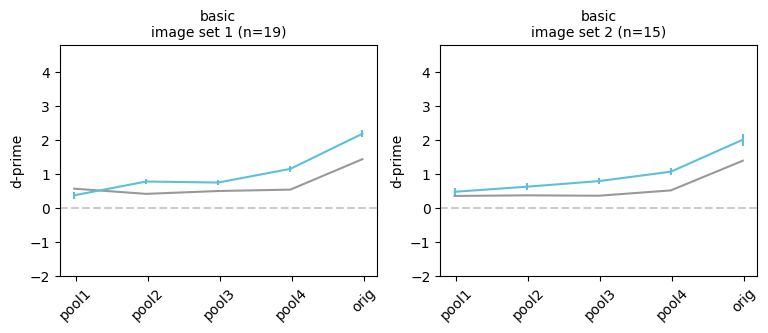

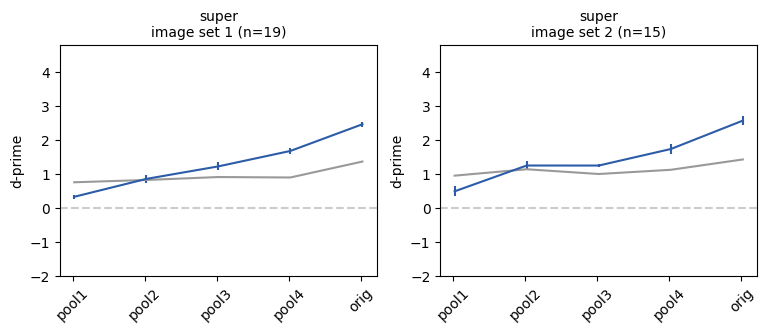

In [6]:
plot_utils.set_all_font_sizes(10)

for cc, cue in enumerate(cue_level_names):
    
    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):

        subjects_plot = (subject_cb==cbi)
        n_subs_plot = np.sum(subjects_plot)
    
        ax = plt.subplot(1,2,cbi+1)

        lh = []

        vals = dprime_by_condition[subjects_plot,cc,:]

        meanvals = np.mean(vals, axis=0)
        semvals = np.std(vals, axis=0)/np.sqrt(n_subs_plot)

        h = plt.errorbar(np.arange(n_image_types)+xjitters[cc], \
                         meanvals, \
                         semvals, \
                        color = cue_level_colors[cc,:])
        # lh.append(h)
        
        if cc==0:
            vals = np.mean(d['dprime_basic_overall'][:,super_cbinds==cbi], axis=1)
        else:
            vals = d['dprime_super_overall'][:,cbi]
    
        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                 '-',color=[0.6, 0.6, 0.6])
        

        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)


        plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

        # ax.legend(lh, np.repeat(cue_level_names,2), loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])

        plt.title('%s\nimage set %d (n=%d)'%(cue, cb,n_subs_plot))


#### Plot overall "performance" of SimCLR for each condition

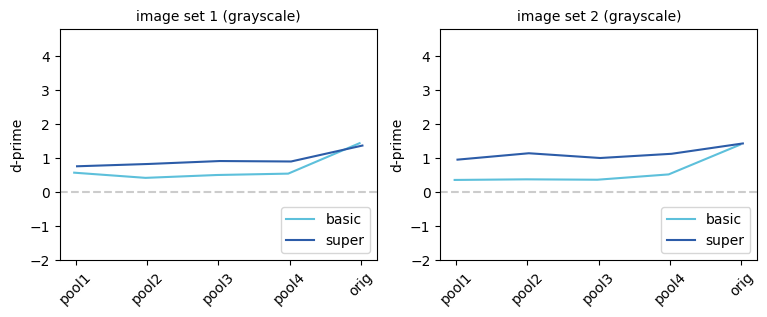

In [7]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(9,3))

for cbi, cb in enumerate([1,2]):

    ax = plt.subplot(1,2,cb)

    # lh = []
    
    vals1 = np.mean(d['dprime_basic_overall'][:,super_cbinds==cbi], axis=1)
    vals2 = d['dprime_super_overall'][:,cbi]
    
    for cc, vals in enumerate([vals1, vals2]):

        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                 '-',color=cue_level_colors[cc,:])
        
        # lh.append(h[0])
       
        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)
        

    plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')

    # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
    ax.legend(cue_level_names, loc='lower right')

    plt.ylabel('d-prime')

    plt.ylim([-2, 4.8])
    
    plt.title('image set %d (grayscale)'%(cb))
    
# plt.suptitle('discriminability of categories in SimCLR');

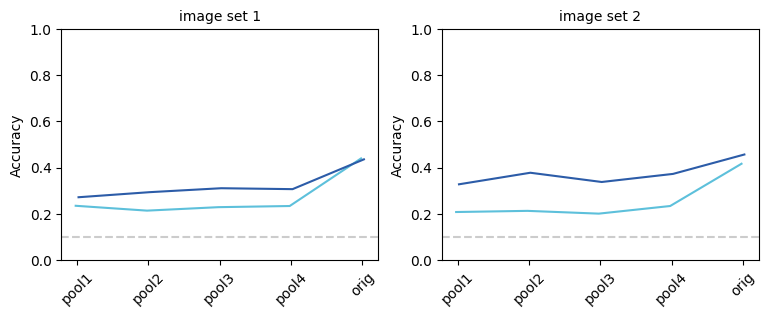

In [8]:
plot_utils.set_all_font_sizes(10)
plt.figure(figsize=(9,3))

for cbi, cb in enumerate([1,2]):

    ax = plt.subplot(1,2,cb)

    # lh = []
    
    vals1 = np.mean(d['acc_basic_overall'][:,super_cbinds==cbi], axis=1)
    vals2 = d['acc_super_overall'][:,cbi]
    
    for cc, vals in enumerate([vals1, vals2]):

        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                 '-',color=cue_level_colors[cc,:])
        
        # lh.append(h[0])
       
        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)
        

    plt.axhline(1/10, color=[0.8, 0.8, 0.8], linestyle='--')

    # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')

    plt.ylabel('Accuracy')

    plt.ylim([0, 1.0])
    
    plt.title('image set %d'%(cb))
    

#### Compare natural or artificial categories

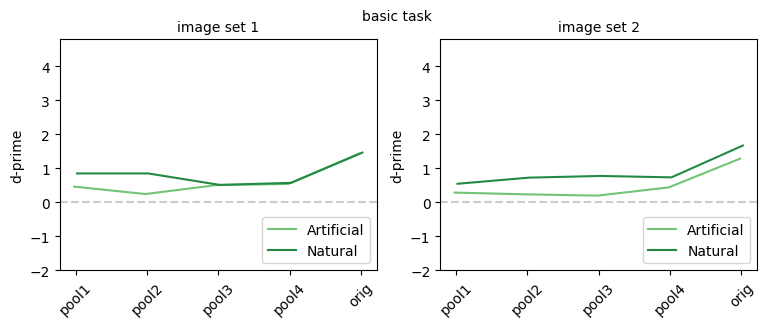

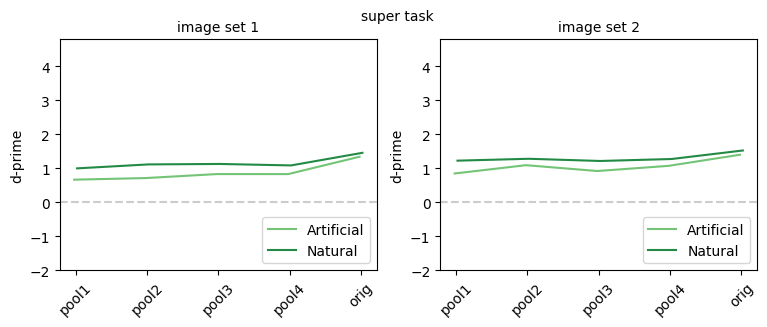

In [9]:
is_natural = np.array([1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1]).astype(bool)
kind_names = ['Artificial','Natural']
n_kinds = len(kind_names)
n_image_sets = 2

dprime_by_nat = np.zeros((n_image_sets, n_cue_levels, n_image_types, n_kinds))

for ii in range(n_image_types):
    for kk in range(n_kinds):
        
        for cbi, cb in enumerate([1,2]):
        
            super_inds_use = (is_natural==kk) & (super_cbinds==cbi)
            
            # basic
            dprime_by_nat[cbi, 0, ii, kk] = np.mean(d['dprime_basic_overall'][ii, super_inds_use])
            
            # super
            dprime_by_nat[cbi, 1, ii, kk] = np.mean(d['dprime_each_supcat'][super_inds_use,ii])
            
plot_utils.set_all_font_sizes(10)

nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]
n_kinds = 2
kind_names = ['Artificial','Natural']

for cc in [0,1]:
    
    plt.figure(figsize=(9,3))

    for cbi, cb in enumerate([1,2]):
    
        ax = plt.subplot(1,2,cb)
        
       
        vals = dprime_by_nat[cbi,cc,:,:]
        
        plot_vals = vals;
       
        lh = []
        
        for kk in range(n_kinds):

            h = plt.errorbar(np.arange(n_image_types)+xjitters[kk], \
                             vals[:,kk], \
                             # semvals[:,kk], \
                            color = nat_colors[kk,:])
            lh.append(h)
            
        plt.title('image set %d'%(cb))
        
        plt.xticks(np.arange(n_image_types), image_type_names, rotation=45)


        plt.axhline(0.0, color=[0.8, 0.8, 0.8], linestyle='--')

        ax.legend(lh, kind_names, loc='lower right')

        plt.ylabel('d-prime')

        plt.ylim([-2, 4.8])
        
    plt.suptitle('%s task'%(cue_level_names[cc]))

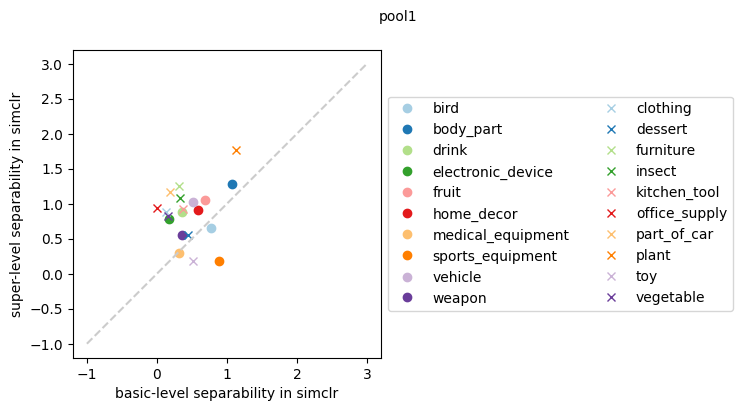

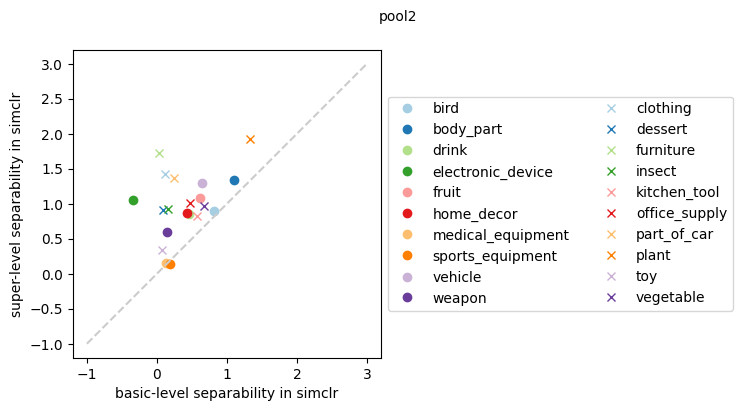

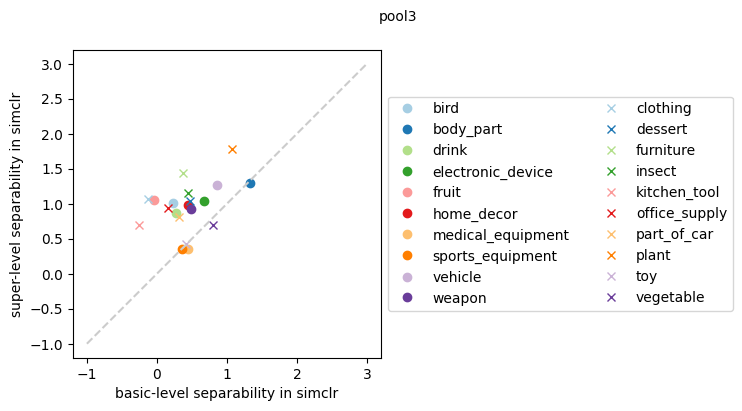

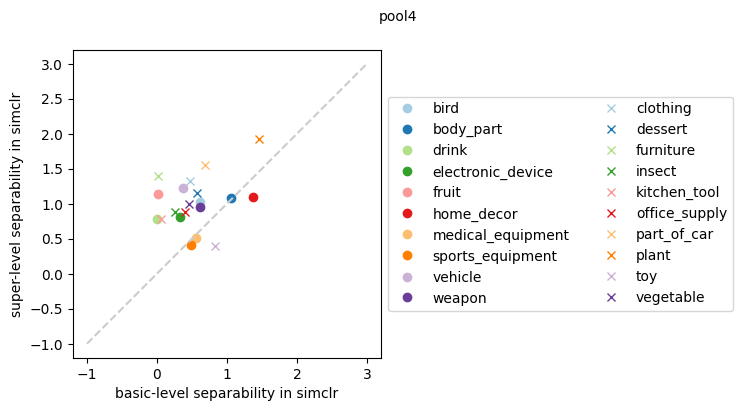

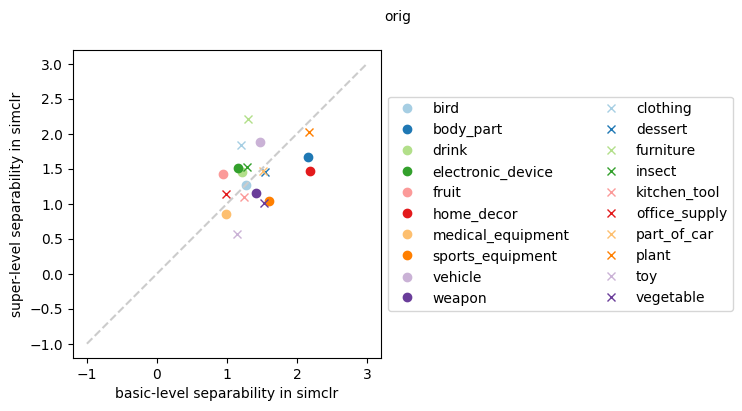

In [10]:
for ii in range(5):
    
    plt.figure(figsize=(12,4))

    lims = [-1, 3.0]

    ax = plt.subplot(1,1,1)

    allh = []
    # pi=0
    for cbi in [0,1]:

        # pi+=1
        
        supnames = super_names[super_cbinds==cbi]

        # overall performance at basic-level classification, within supcat
        dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

        # performance at super-ordinate classification, for each supcat
        dist2 = d['dprime_each_supcat'][super_cbinds==cbi, ii]
        
        assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
        
        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('basic-level separability in simclr')
    plt.ylabel('super-level separability in simclr')

    plt.xlim(lims)
    plt.ylim(lims)

    plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, super_names, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])

In [11]:
for cc in range(n_cue_levels):

    for ii in range(n_image_types):
    
        # SimCLR performance at super-level classification, within supcat
        simclr_dprime_super = d['dprime_each_supcat'][:,ii]

        # SimCLR performance at basic-level classification, within supcat
        simclr_dprime_basic = d['dprime_basic_overall'][ii,:]

        # human performance at classification, for each supcat
        human_dprime = np.concatenate([np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0) for cbi in [0,1]], axis=0)
   
        print('%s %s task:'%(image_type_names[ii], cue_level_names[cc]))
    
        out = stats_utils.compute_partial_corr(simclr_dprime_super, human_dprime, simclr_dprime_basic, return_p=True)
        print('  super partial corr: %.2f, p=%.5f'%(out[0], out[1]))
        out = stats_utils.compute_partial_corr(simclr_dprime_basic, human_dprime, simclr_dprime_super, return_p=True)
        print('  basic partial corr: %.2f, p=%.5f'%(out[0], out[1]))

pool1 basic task:
  super partial corr: 0.23, p=0.32657
  basic partial corr: -0.13, p=0.58577
pool2 basic task:
  super partial corr: -0.05, p=0.82821
  basic partial corr: 0.07, p=0.78141
pool3 basic task:
  super partial corr: 0.32, p=0.17139
  basic partial corr: 0.25, p=0.28860
pool4 basic task:
  super partial corr: -0.49, p=0.02766
  basic partial corr: 0.21, p=0.37248
orig basic task:
  super partial corr: -0.05, p=0.84524
  basic partial corr: -0.24, p=0.31823
pool1 super task:
  super partial corr: 0.63, p=0.00305
  basic partial corr: 0.34, p=0.14068
pool2 super task:
  super partial corr: 0.63, p=0.00290
  basic partial corr: 0.14, p=0.54614
pool3 super task:
  super partial corr: 0.65, p=0.00177
  basic partial corr: -0.32, p=0.17285
pool4 super task:
  super partial corr: 0.62, p=0.00379
  basic partial corr: -0.43, p=0.05563
orig super task:
  super partial corr: 0.64, p=0.00243
  basic partial corr: -0.44, p=0.05256


0.4150596209637295
(0.6442512095166989, 0.002169816303602821)
0.4689860368509835
(0.6848255521306016, 0.00086420160378132)
0.3631113949924917
(0.6025872509375647, 0.004924474011703045)
0.2655284090007374
(0.515294487648313, 0.020059314744421776)
0.28409291479442655
(0.5330036724023826, 0.015527508374943875)


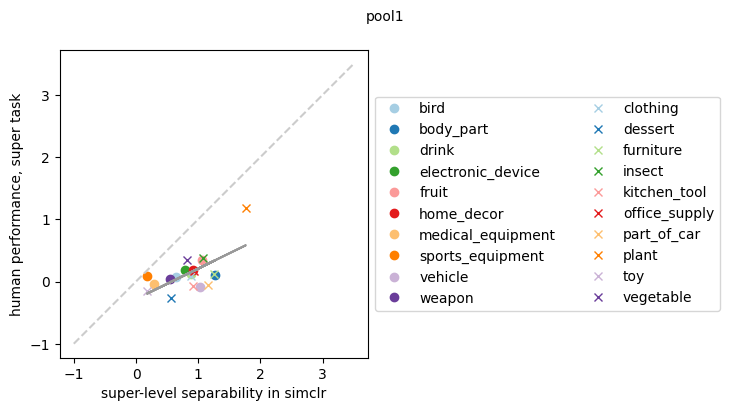

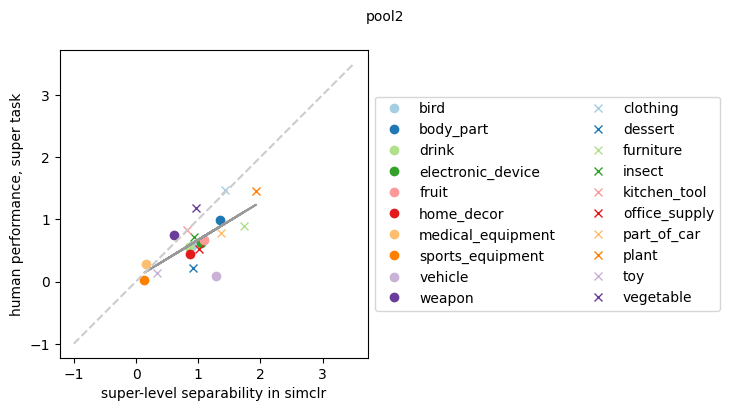

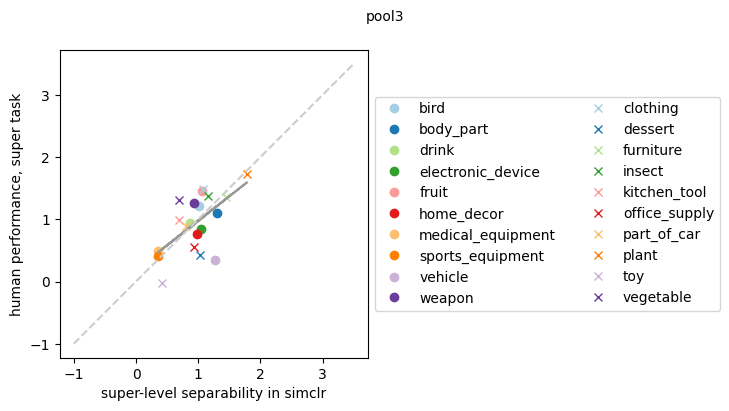

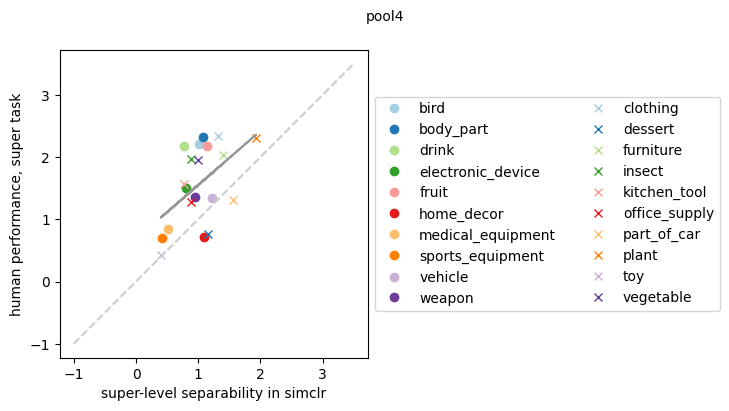

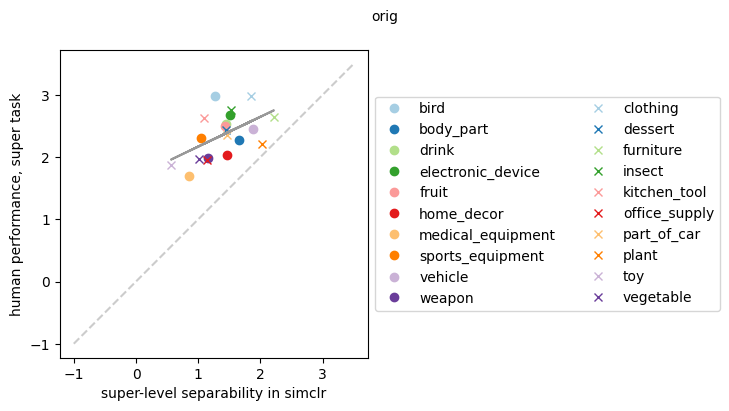

In [12]:
for cc in [1]:

    for ii in range(5):

        plt.figure(figsize=(12,4))

        lims = [-1, 3.5]

        ax = plt.subplot(1,1,1)

        xvals = []; yvals = []
        # pi=0
        # pi = 1
        allh = []
        for cbi in [0,1]:


            # SimCLR performance at super-level classification, within supcat
            dist1 = d['dprime_each_supcat'][super_cbinds==cbi,ii]

            # human performance at basic-level classification, for each supcat
            dist2 = np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0)

            xvals+=[dist1]
            yvals+=[dist2]

            assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
            assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

            basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

            for bi in range(len(dist1)):

                h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

                allh+=[h]

        xvals = np.concatenate(xvals)
        yvals = np.concatenate(yvals)
        yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
        plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])
        print(r2)
        print(scipy.stats.pearsonr(xvals, yvals))


        # plt.title('image set %d'%(cbi+1))

        plt.xlabel('super-level separability in simclr')
        plt.ylabel('human performance, %s task'%cue_level_names[cc])

        plt.xlim(lims)
        plt.ylim(lims)

        plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

        plt.axis('square')
        # Put a legend to the right of the current axis
        ax.legend(allh, list(super_names), loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


        plt.suptitle(image_type_names[ii])

0.006847290326213895
(-0.08274835542906142, 0.728719456432789)
0.002460707192642797
(0.04960551574818193, 0.8354745465735091)
0.13807804093503784
(0.37158853714160506, 0.1067079432531977)
0.0015519553936668151
(0.03939486506724637, 0.869023932719678)
0.0713410567459295
(-0.2670974667531116, 0.25494592651382203)


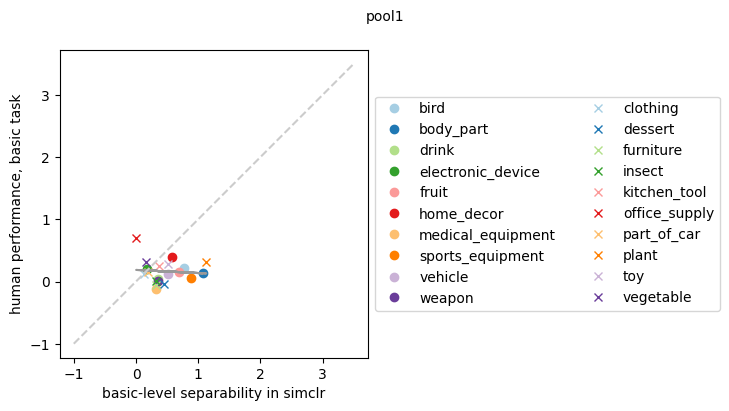

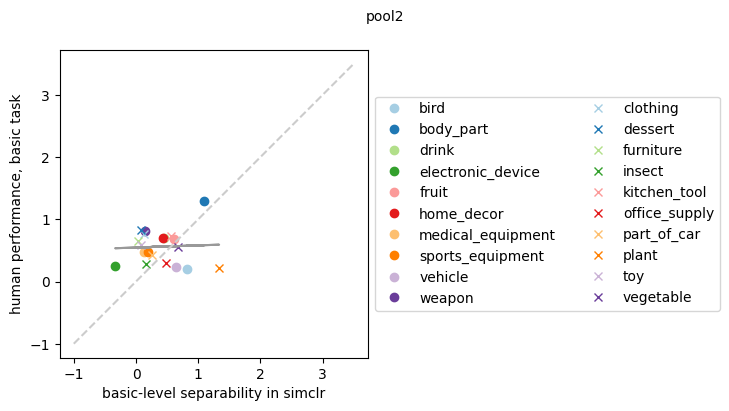

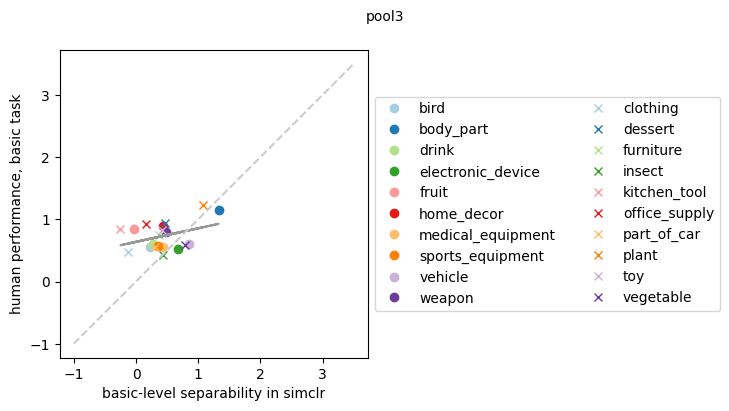

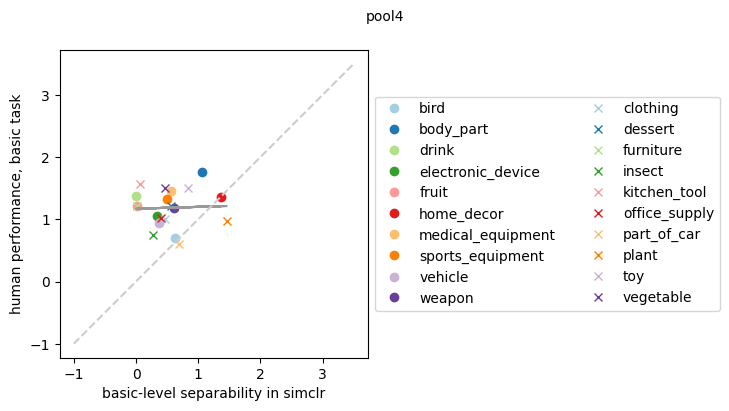

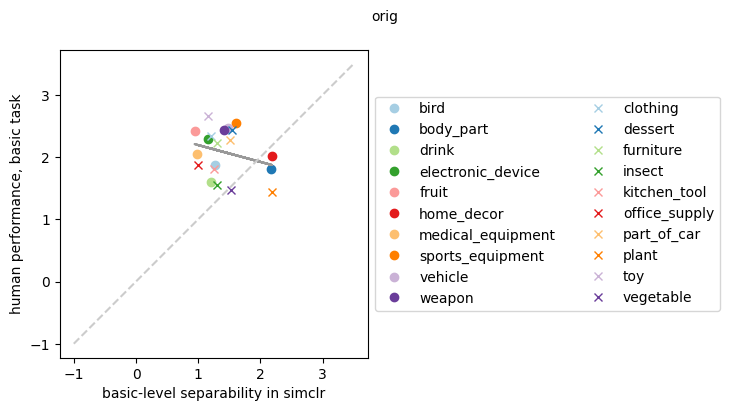

In [13]:
for cc in [0]:

    for ii in range(5):

        plt.figure(figsize=(12,4))

        lims = [-1, 3.5]

        ax = plt.subplot(1,1,1)

        xvals = []; yvals = []
        # pi=0
        # pi = 1
        allh = []
        for cbi in [0,1]:


            # SimCLR performance at basic-level classification, within supcat
            dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

            # human performance at basic-level classification, for each supcat
            dist2 = np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0)

            xvals+=[dist1]
            yvals+=[dist2]

            assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
            assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

            basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

            for bi in range(len(dist1)):

                h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

                allh+=[h]

        xvals = np.concatenate(xvals)
        yvals = np.concatenate(yvals)
        yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
        plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])
        print(r2)
        print(scipy.stats.pearsonr(xvals, yvals))


        # plt.title('image set %d'%(cbi+1))

        plt.xlabel('basic-level separability in simclr')
        plt.ylabel('human performance, %s task'%cue_level_names[cc])

        plt.xlim(lims)
        plt.ylim(lims)

        plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

        plt.axis('square')
        # Put a legend to the right of the current axis
        ax.legend(allh, list(super_names), loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


        plt.suptitle(image_type_names[ii])